In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

customer_data = pd.read_csv('Retail Data v4 - unclean.csv')

customer_data[0:20]

,Age,Gender,Married,Salary,Annual Spend
0,28.2,Male,Single,26908.95,331.56
1,43.5,Female,Married,39366.44,3071.18
2,27.7,Female,Single,NaN,1357.19
3,18.9,Male,Single,26235.55,769.78
4,18.0,Male,Single,30822.14,100.00
5,22.9,Female,Single,18334.52,2854.59
6,43.5,Female,Married,36642.04,1926.37
7,28.0,Male,Single,34612.04,853.10
8,52.3,Female,Married,34779.79,NaN
9,27.2,Female,Single,21901.08,566.21


In [2]:
for col in customer_data:
    null_count = customer_data[col].isnull().sum()
    print(f"{null_count} missing data in {col}")

10 missing data in Age
0 missing data in Gender
0 missing data in Married
9 missing data in Salary
10 missing data in Annual Spend


In [3]:
numeric_cols = ['Age', 'Salary', 'Annual Spend']
for col in numeric_cols:
    customer_data[col].fillna(customer_data[col].mean(), inplace=True)

category_cols = ['Gender', 'Married']
for col in category_cols:
    one_hot_check = pd.get_dummies(customer_data[col], prefix=col)
    customer_data.drop(col, axis=1, inplace=True)
    customer_data = one_hot_check.join(customer_data)

customer_data[0:20]

,Married_Married,Married_Single,Gender_Female,Gender_Male,Age,Salary,Annual Spend
0,False,True,False,True,28.200000,26908.950000,331.560000
1,True,False,True,False,43.500000,39366.440000,3071.180000
2,False,True,True,False,27.700000,36629.132727,1357.190000
3,False,True,False,True,18.900000,26235.550000,769.780000
4,False,True,False,True,18.000000,30822.140000,100.000000
5,False,True,True,False,22.900000,18334.520000,2854.590000
6,True,False,True,False,43.500000,36642.040000,1926.370000
7,False,True,False,True,28.000000,34612.040000,853.100000
8,True,False,True,False,52.300000,34779.790000,2159.080891
9,False,True,True,False,27.200000,21901.080000,566.210000


In [4]:
for col in customer_data:
    null_count = customer_data[col].isnull().sum()
    print(f"{null_count} missing data in {col}")

0 missing data in Married_Married
0 missing data in Married_Single
0 missing data in Gender_Female
0 missing data in Gender_Male
0 missing data in Age
0 missing data in Salary
0 missing data in Annual Spend


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Salary', ylabel='Age'>,
        <Axes: xlabel='Annual Spend', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Salary'>,
        <Axes: xlabel='Salary', ylabel='Salary'>,
        <Axes: xlabel='Annual Spend', ylabel='Salary'>],
       [<Axes: xlabel='Age', ylabel='Annual Spend'>,
        <Axes: xlabel='Salary', ylabel='Annual Spend'>,
        <Axes: xlabel='Annual Spend', ylabel='Annual Spend'>]],
      dtype=object)

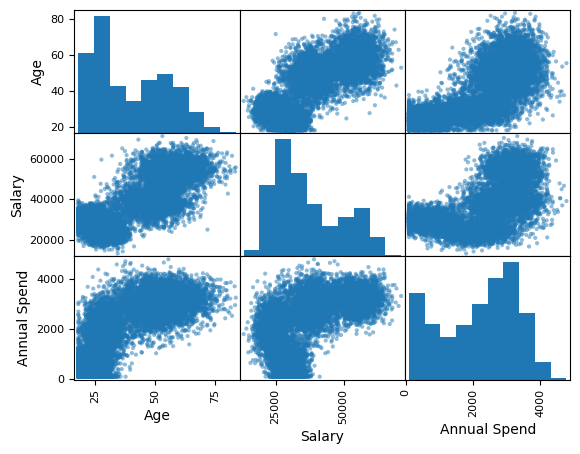

In [5]:
numeric_col_data = customer_data.loc[:,('Age', 'Salary', 'Annual Spend')]
pd.plotting.scatter_matrix(numeric_col_data)

In [6]:
standardised_customer_data = preprocessing.scale(customer_data)
standardised_customer_data_df = pd.DataFrame(standardised_customer_data, columns=customer_data.columns)
standardised_customer_data_df

,Married_Married,Married_Single,Gender_Female,Gender_Male,Age,Salary,Annual Spend
0,-0.986911,0.986911,-1.001465,1.001465,-0.753194,-0.789381,-1.596013
1,1.013263,-1.013263,0.998537,-0.998537,0.257177,0.222298,0.796556
2,-0.986911,0.986911,0.998537,-0.998537,-0.786213,0.000000,-0.700309
3,-0.986911,0.986911,-1.001465,1.001465,-1.367342,-0.844068,-1.213306
4,-0.986911,0.986911,-1.001465,1.001465,-1.426776,-0.471589,-1.798240
...,...,...,...,...,...,...,...
10242,-0.986911,0.986911,0.998537,-0.998537,-1.043759,-1.007871,-0.331365
10243,-0.986911,0.986911,0.998537,-0.998537,-0.858854,-0.798771,0.168838
10244,-0.986911,0.986911,-1.001465,1.001465,-1.156022,-0.611730,-1.527292
10245,-0.986911,0.986911,0.998537,-0.998537,-1.096589,-1.071259,-0.186158


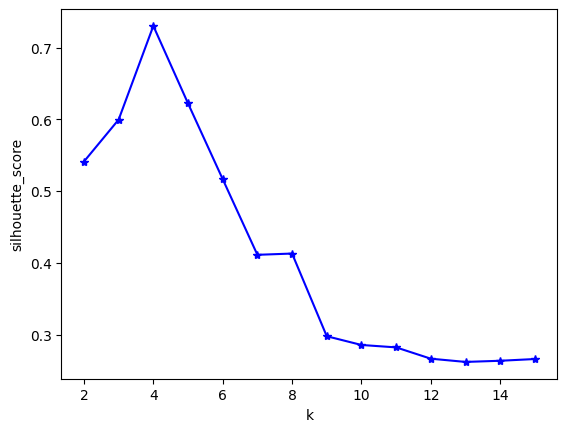

In [7]:
%matplotlib inline
from sklearn import metrics

def k_silhouette(X, clusters):
    K = range(2, clusters+1)
    score = []
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(X)
        labels = kmeans.labels_
        score.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    
    plt.plot(K, score, 'b*-')
    plt.xlabel('k')
    plt.ylabel('silhouette_score')

    plt.show()

k_silhouette(standardised_customer_data_df, 15)

In [8]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(standardised_customer_data_df)
y_km = kmeans.fit_predict(standardised_customer_data_df)
print(y_km[0:20])

[2 3 0 2 2 0 3 2 3 0 3 0 0 3 0 0 3 0 1 0]


In [9]:
print(customer_data[y_km==2][0:10])

    Married_Married  Married_Single  Gender_Female  Gender_Male   Age  \
0             False            True          False         True  28.2   
3             False            True          False         True  18.9   
4             False            True          False         True  18.0   
7             False            True          False         True  28.0   
25            False            True          False         True  40.3   
29            False            True          False         True  23.8   
31            False            True          False         True  29.6   
33            False            True          False         True  19.4   
37            False            True          False         True  24.2   
42            False            True          False         True  18.3   

      Salary  Annual Spend  
0   26908.95        331.56  
3   26235.55        769.78  
4   30822.14        100.00  
7   34612.04        853.10  
25  30670.10        630.37  
29  34838.14        31

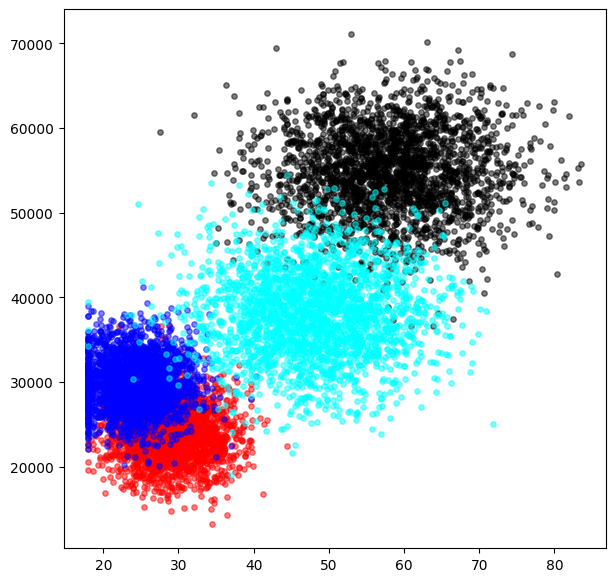

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(customer_data[y_km==0]['Age'], customer_data[y_km==0]['Salary'], s=15, c='red', alpha=0.5)
plt.scatter(customer_data[y_km==1]['Age'], customer_data[y_km==1]['Salary'], s=15, c='black', alpha=0.5)
plt.scatter(customer_data[y_km==2]['Age'], customer_data[y_km==2]['Salary'], s=15, c='blue', alpha=0.5)
plt.scatter(customer_data[y_km==3]['Age'], customer_data[y_km==3]['Salary'], s=15, c='cyan', alpha=0.5)

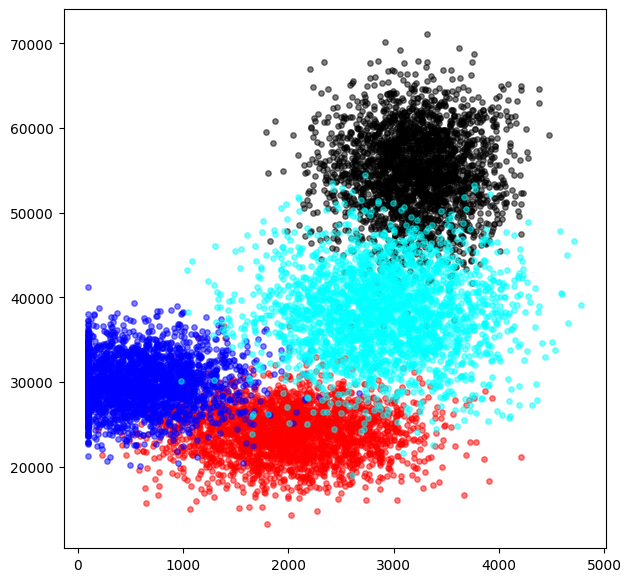

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(customer_data[y_km==0]['Annual Spend'], customer_data[y_km==0]['Salary'], s=15, c='red', alpha=0.5)
plt.scatter(customer_data[y_km==1]['Annual Spend'], customer_data[y_km==1]['Salary'], s=15, c='black', alpha=0.5)
plt.scatter(customer_data[y_km==2]['Annual Spend'], customer_data[y_km==2]['Salary'], s=15, c='blue', alpha=0.5)
plt.scatter(customer_data[y_km==3]['Annual Spend'], customer_data[y_km==3]['Salary'], s=15, c='cyan', alpha=0.5)

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20,20)
ax.set_xlabel('Annual Spend')
ax.set_ylabel('Salary')
ax.set_zlabel('Age')

ax.scatter(customer_data[y_km==0]['Annual Spend'], customer_data[y_km==0]['Salary'], s=15, c='red', alpha=0.5)
ax.scatter(customer_data[y_km==1]['Annual Spend'], customer_data[y_km==1]['Salary'], s=15, c='black', alpha=0.5)
ax.scatter(customer_data[y_km==2]['Annual Spend'], customer_data[y_km==2]['Salary'], s=15, c='blue', alpha=0.5)
ax.scatter(customer_data[y_km==3]['Annual Spend'], customer_data[y_km==3]['Salary'], s=15, c='cyan', alpha=0.5)


Using matplotlib backend: <object object at 0x1794dbe60>
